In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [7]:
columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
        'households', 'median_income', 'ocean_proximity', 'median_house_value']

In [8]:
housing=housing[columns]

In [9]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,286600.0,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,340600.0,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,196900.0,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,46300.0,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,254500.0,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,240200.0,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,113000.0,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,97800.0,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,225900.0,3


In [14]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,500001.0,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN,240300.0,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN,218200.0,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND,182100.0,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND,121300.0,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND,76400.0,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN,134000.0,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN,311700.0,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND,133500.0,4


In [ ]:
strat_train_set.to_csv("datasets/housing/strat_train_set.csv")

In [ ]:
strat_test_set.to_csv("datasets/housing/strat_test_set.csv")

In [15]:
#strat_train_set.to_csv("train_data_without_header.csv",header=False,index=False)

In [16]:
#strat_test_set.to_csv("test_data_without_header.csv",header=False,index=False)

In [17]:
#import sagemaker

#files = ['train_data_without_header.csv', 'test_data_without_header.csv']
#session = sagemaker.Session()

#for file in files:
 #   url = session.upload_data(
#      file,
 #       bucket="empid-bucketname",
#        key_prefix="housing/input-datasets"
#    )
    
#print(url) 

s3://empid-bucketname/housing/input-datasets/test_data_without_header.csv


In [33]:
import boto3
import sagemaker
bucket = "empid-bucketname"

In [35]:
strat_train_set.shape

(16512, 11)

In [36]:
strat_test_set.shape

(4128, 11)

In [37]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [40]:
strat_train_set.to_csv("s3://empid-bucketname/housing_train_data.csv", header=False,index=False)

In [41]:
strat_test_set.to_csv("s3://empid-bucketname/housing_test_data.csv", header=False,index=False)

49155.170365634505 {'max_features': 7, 'n_estimators': 180}
50987.04312458704 {'max_features': 5, 'n_estimators': 15}
50615.062741858346 {'max_features': 3, 'n_estimators': 72}
50384.45258861629 {'max_features': 5, 'n_estimators': 21}
49311.12724384495 {'max_features': 7, 'n_estimators': 122}
50620.02725664336 {'max_features': 3, 'n_estimators': 75}
50544.81214288387 {'max_features': 3, 'n_estimators': 88}
49425.39483845691 {'max_features': 5, 'n_estimators': 100}
50424.43333681439 {'max_features': 3, 'n_estimators': 150}
64513.81455303026 {'max_features': 5, 'n_estimators': 2}
64756.15287120735 {'max_features': 2, 'n_estimators': 3}
56063.4893319337 {'max_features': 2, 'n_estimators': 10}
53273.90806143431 {'max_features': 2, 'n_estimators': 30}
59101.28067228025 {'max_features': 4, 'n_estimators': 3}
52474.6964949602 {'max_features': 4, 'n_estimators': 10}
50255.25226845538 {'max_features': 4, 'n_estimators': 30}
58478.93093971638 {'max_features': 6, 'n_estimators': 3}
51882.75302588

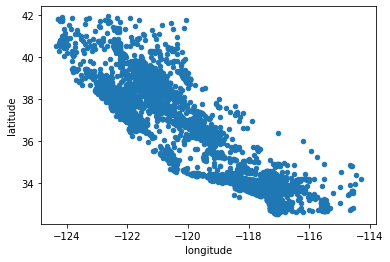

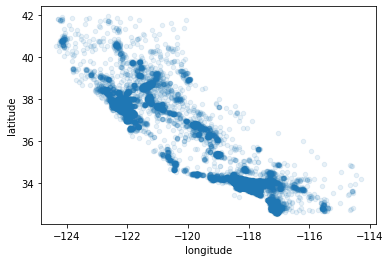

In [17]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"]
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"]
housing_tr["population_per_household"]=housing_tr["population"]/housing_tr["households"]

housing_cat = housing[['ocean_proximity']]
housing_prepared = housing_tr.join(pd.get_dummies(housing_cat, drop_first=True))

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, housing_prepared.columns), reverse=True)


final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_num = X_test.drop('ocean_proximity', axis=1)
X_test_prepared = imputer.transform(X_test_num)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=X_test_num.columns,
                          index=X_test.index)
X_test_prepared["rooms_per_household"] = X_test_prepared["total_rooms"]/X_test_prepared["households"]
X_test_prepared["bedrooms_per_room"] = X_test_prepared["total_bedrooms"]/X_test_prepared["total_rooms"]
X_test_prepared["population_per_household"]=X_test_prepared["population"]/X_test_prepared["households"]

X_test_cat = X_test[['ocean_proximity']]
X_test_prepared = X_test_prepared.join(pd.get_dummies(X_test_cat, drop_first=True))


final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)